## Alaska PCod v. Korea PCod comparison

The Alaskan PCod data has much fewer final filtered loci than the Korean PCod data, despite the processing steps being the same. To explore this further, I BLASTed both final filtered genepop files against each other, and then BLASTed both double-filtered reference databases against each other. 

<br>
<br>
### I. BLAST final filtered genepop files against each other

### 1) Create fasta files from the final filtered genepop files

**Alaska**

In [1]:
cd ../stacks_b2_wgenome

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/stacks_b2_wgenome


In [12]:
!head ../scripts/genBOWTIEfasta_from_actualGENEPOP.py

### This python script will create a list of loci from the `populations` output genepop file ###

## ARGUMENTS: 
#ARG 1 - genepop file from `populations`. 
#ARG 2 - the .catalog file output from `cstacks` (unzipped)


import sys

#open the genepop file


In [11]:
!python ../scripts/genBOWTIEfasta_from_actualGENEPOP.py \
batch_2_filteredMAF_filteredLoci_filteredIndivids.txt \
batch_2.catalog.tags.tsv

-----
Reading loci from file:
batch_2_filteredMAF_filteredLoci_filteredIndivids.txt
Alaska PCod final genepop batch 2


Using sequences from catalog file:
batch_2.catalog.tags.tsv

Writing new fasta file...


In [13]:
!head AK_for_KORblast.fa

>7
TGCAGGTCTCCTTTCTTGGGCAGCAGAGTGAGCACAGCCCTCCTGCAGCTCTGTGGGAGAGAGGAGCGCTCAAAGCTCTGCATGTCTTCCTT
>23
TGCAGGTGTTTCCGAGTCCTGCTAGCGTTCCCGAGATTCCCCGCGGGAGTCCTGTCCACACTATTCTAACTTTCACACATTATTTTTAAAGT
>27
TGCAGGTTCTCGGGGACGTTCTCCTGGATCTGTACCGCTCGCTCAAGTGGGCGGTGCGCTCGGACCCGGATCCGGTCACCGTGCTCCACGCC
>35
TGCAGGAAAATACCTTACTTTATTATCTACAAACTACTACTCATCCACAATTTCTCACCTCAAAATATTTTTTCAATGGCAAAGGCGTCCGT
>55
TGCAGGAATTCAGCAGCGGTGGCTGCGACATGATGCTCTGGGCTGTAGGGGCTCTCGGCAACACTATCCCTGGCCAAAGTGTACATGGACAG


In [17]:
!mv AK_for_KORblast.fa AKb2_for_KORblast.fa

<br>
<br>

**Korea**

In [44]:
cd /mnt/hgfs/Pacific\ cod/DataAnalysis/PCod-Korea-repo/stacks_b4_wgenome

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-Korea-repo/stacks_b4_wgenome


In [46]:
!python ../scripts/genBOWTIEfasta_from_actualGENEPOP.py \
batch_4_filteredMAF_filteredLoci_filteredIndivids_filteredHWE_gen.txt \
batch_4.catalog.tags.tsv

-----
Reading loci from file:
batch_4_filteredMAF_filteredLoci_filteredIndivids_filteredHWE_gen.txt
PCod Korea Lanes 1-4 final filtered genepop


Using sequences from catalog file:
batch_4.catalog.tags.tsv

Writing new fasta file...



<br>
<br>
### 2) Build BLAST database with final filtered Korea fasta file

In [47]:
!makeblastdb -in KORb4_final_filtered.fa \
-parse_seqids \
-dbtype nucl \
-out KOR_b4_FinalfFilteredDB



Building a new DB, current time: 06/13/2017 12:48:14
New DB name:   /mnt/hgfs/Pacific cod/DataAnalysis/PCod-Korea-repo/stacks_b4_wgenome/KOR_b4_FinalfFilteredDB
New DB title:  KORb4_final_filtered.fa
Sequence type: Nucleotide
Keep Linkouts: T
Keep MBits: T
Maximum file size: 1000000000B
Adding sequences from FASTA; added 6959 sequences in 0.13215 seconds.




<br>
### 3) BLAST the Alaska final filtered fasta against the new Korean BLAST database

In [51]:
pwd

u'/mnt/hgfs/Pacific cod/DataAnalysis/PCod-Korea-repo/stacks_b4_wgenome'

In [53]:
!blastn -query ../../PCod-US-repo/stacks_b2_wgenome/AKb2_for_KORblast.fa \
-db KOR_b4_FinalfFilteredDB \
-out ../../PCod-US-repo/stacks_b2_wgenome/AKb2_BLASTedTo_KORb4_out.fa \
-outfmt 10

In [54]:
cd ../../PCod-US-repo/stacks_b2_wgenome

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/stacks_b2_wgenome


In [58]:
!cat AKb2_BLASTedTo_KORb4_out.fa | sed 's/,/ /' | awk '{print $1}' | sort | uniq | wc -l

919


In [46]:
float(919)/float(2945)

0.31205432937181665


<br>
** Number of Final Filtered Loci: **

** Korea: 7,663 loci**

** Alaska: 2,945 loci**

** MATCHES: 919 --31.2% of AK loci **

In [74]:
pwd

u'/mnt/hgfs/Pacific cod/DataAnalysis/PCod-Korea-repo/stacks_b4_wgenome/refgenome'

In [1]:
cd /mnt/hgfs/Pacific\ cod/DataAnalysis/PCod-US-repo/stacks_b2_wgenome

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/stacks_b2_wgenome


In [2]:
# create a dictionary with the # of times each AK locus is matched to a KOR locus
myfile = open("AKb2_BLASTedTo_KORb4_out.fa", "r")

uniqueloci = {}

for line in myfile:
    locus = line.strip().split(",")[0]
    if locus not in uniqueloci:
        uniqueloci[locus] = 1
    elif locus in uniqueloci:
        count = uniqueloci[locus]
        newcount = int(count) + 1
        uniqueloci[locus] = newcount
        
myfile.close()

In [3]:
#extract counts from dictionary
vals = uniqueloci.values()
match_counts = []
for val in vals:
    match_counts.append(float(val))
print type(match_counts[20])

<type 'float'>


In [23]:
max(match_counts)

56.0

In [7]:
import matplotlib.pyplot as plt
import numpy as np

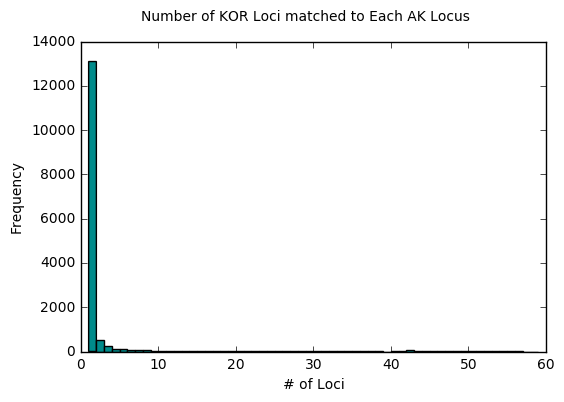

In [31]:
#plot frequency of counts
plt.hist(match_counts, bins = np.arange(1,60,1), color = "darkcyan")
plt.suptitle("Number of KOR Loci matched to Each AK Locus")
plt.xlabel("# of Loci")
plt.ylabel("Frequency")
plt.show()

In [32]:
plt.close()

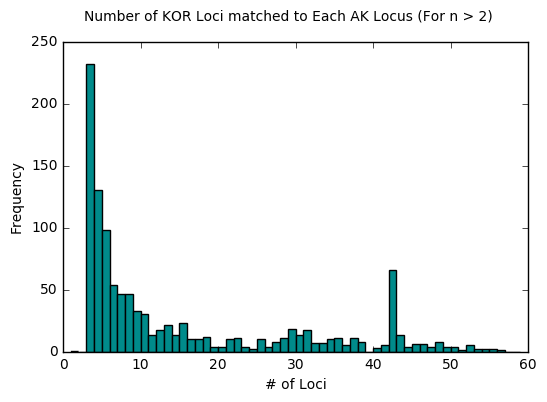

In [33]:
plt.hist([num for num in match_counts if num > 2] , bins = np.arange(1,60,1), color = "darkcyan")
plt.suptitle("Number of KOR Loci matched to Each AK Locus (For n > 2)")
plt.xlabel("# of Loci")
plt.ylabel("Frequency")
plt.show()

In [34]:
plt.close()







<br>


<br>

### II. BLAST each reference database against the other

I'm going to BLAST the AK batch 2 fasta against the KOR batch 4 database.

I already have BLAST reference databases built from BOWTIE filtered files. But I need a BLAST reference database from BOWTIE and BLAST filtered files. 


### 1) Build BLAST database from KOR blast & bowtie filtered output file

This was the fasta file that I converted to a `.sam` file to align each individual to before `pstacks`.

In [59]:
pwd

u'/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/stacks_b2_wgenome'

In [60]:
cd ../../PCod-Korea-repo/stacks_b4_wgenome

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-Korea-repo/stacks_b4_wgenome


In [61]:
cd refgenome/

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-Korea-repo/stacks_b4_wgenome/refgenome


In [62]:
!makeblastdb -in batch_4_BOWTIE_BLAST_filtered.fa \
-parse_seqids \
-dbtype nucl \
-out batch_4_BOWTIEBLASTfilteredDB



Building a new DB, current time: 06/13/2017 13:04:09
New DB name:   /mnt/hgfs/Pacific cod/DataAnalysis/PCod-Korea-repo/stacks_b4_wgenome/refgenome/batch_4_BOWTIEBLASTfilteredDB
New DB title:  batch_4_BOWTIE_BLAST_filtered.fa
Sequence type: Nucleotide
Keep Linkouts: T
Keep MBits: T
Maximum file size: 1000000000B
Adding sequences from FASTA; added 25221 sequences in 0.458242 seconds.


### 2) BLAST AK batch 2 against new KOR batch 4 database

AK batch 2 - this is the file that was filtered through BOWTIE and BLAST that I converted to a .sam file to align each individual to before pstacks.


In [63]:
pwd

u'/mnt/hgfs/Pacific cod/DataAnalysis/PCod-Korea-repo/stacks_b4_wgenome/refgenome'

In [64]:
!blastn -query ../../../PCod-US-repo/stacks_b2/refgenome/batch_2_BOWTIE_BLAST_filtered.fa \
-db batch_4_BOWTIEBLASTfilteredDB \
-out ../../../PCod-US-repo/stacks_b2_wgenome/AKb2DB_BLASTedTo_KORb4DB_out.fa \
-outfmt 10

In [66]:
cd ../../../PCod-US-repo/stacks_b2_wgenome

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/stacks_b2_wgenome


In [68]:
!cat AKb2DB_BLASTedTo_KORb4DB_out.fa | sed 's/,/ /' | awk '{print $1}' | sort | uniq | wc -l

14693


In [45]:
float(14693)/float(19509)

0.7531395766056692

**Number of Loci in BOWTIE & BLAST filtered DB fasta files:**

** Korea: 25,221 loci**

** Alaska: 19,509 loci**

**MATCHES: 14,693 -- 75.3% of AK Loci**


<br>

In [69]:
cd ../stacks_b2/refgenome/

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/stacks_b2/refgenome


In [71]:
!grep "^>" batch_2_BOWTIE_BLAST_filtered.fa | wc -l

19509


In [72]:
cd ../../../PCod-Korea-repo/stacks_b4_wgenome/refgenome/

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-Korea-repo/stacks_b4_wgenome/refgenome


In [73]:
!grep "^>" batch_4_BOWTIE_BLAST_filtered.fa | wc -l

25221


In [14]:
cd /mnt/hgfs/Pacific\ cod/DataAnalysis/PCod-US-repo/stacks_b2_wgenome

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/stacks_b2_wgenome


In [35]:
# create a dictionary with the # of times each AK locus is matched to a KOR locus
myfile = open("AKb2DB_BLASTedTo_KORb4DB_out.fa", "r")

uniqueloci = {}

for line in myfile:
    locus = line.strip().split(",")[0]
    if locus not in uniqueloci:
        uniqueloci[locus] = 1
    elif locus in uniqueloci:
        count = uniqueloci[locus]
        newcount = int(count) + 1
        uniqueloci[locus] = newcount
        
myfile.close()

In [36]:
#extract counts from dictionary
vals = uniqueloci.values()
match_counts = []
for val in vals:
    match_counts.append(float(val))
print type(match_counts[20])

<type 'float'>


In [37]:
max(match_counts)

56.0

In [38]:
import numpy as np
import matplotlib.pyplot as plt

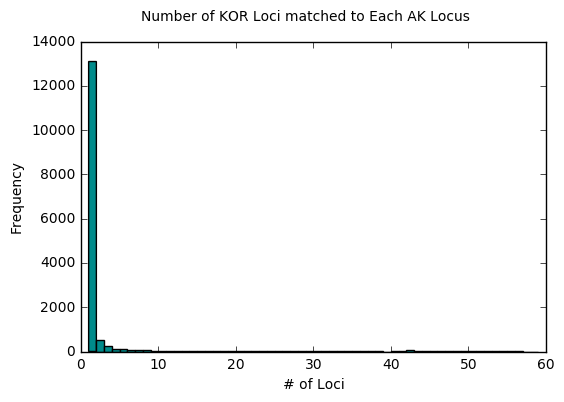

In [41]:
#plot frequency of counts
plt.hist(match_counts, bins = np.arange(1,60,1), color = "darkcyan")
plt.suptitle("Number of KOR Loci matched to Each AK Locus")
plt.xlabel("# of Loci")
plt.ylabel("Frequency")
plt.show()

In [42]:
plt.close()

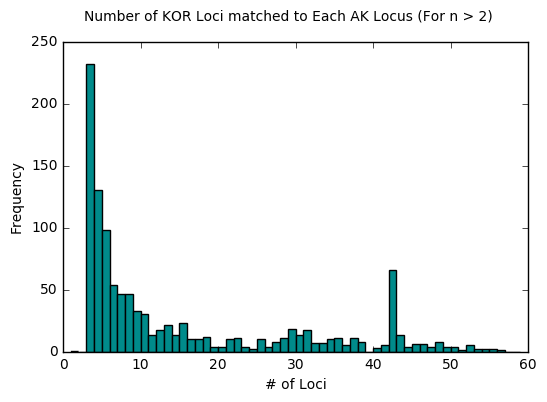

In [43]:
plt.hist([num for num in match_counts if num >2], bins = np.arange(1,60,1), color = "darkcyan")
plt.suptitle("Number of KOR Loci matched to Each AK Locus (For n > 2)")
plt.xlabel("# of Loci")
plt.ylabel("Frequency")
plt.show()

In [44]:
plt.close()



<br>

<br>

#### I'm now curious if the cod gene that Dan has been looking at is (a) present and (b) polymorphic in either, or both, populations. 

**KOR final filtered genepop**

In [59]:
pwd

u'/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/stacks_b2_wgenome/refgenome'

In [61]:
cd ../../../PCod-Korea-repo/stacks_b4_wgenome

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-Korea-repo/stacks_b4_wgenome


In [64]:
!blastn -query ../analyses/CodGene.fa \
-db KOR_b4_FinalfFilteredDB \
-out ../analyses/CodGene_to_KORb4finalDB.fa \


**AK final filtered genepop**

In [53]:
cd ../../../PCod-US-repo/stacks_b2_wgenome

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/stacks_b2_wgenome


In [54]:
!mkdir refgenome

In [55]:
cd refgenome

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/stacks_b2_wgenome/refgenome


In [57]:
!makeblastdb -in AKb2_for_KORblast.fa \
-parse_seqids \
-dbtype nucl \
-out AK_b2_FinalFilteredDB



Building a new DB, current time: 06/13/2017 14:36:24
New DB name:   /mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/stacks_b2_wgenome/refgenome/AK_b2_FinalFilteredDB
New DB title:  AKb2_for_KORblast.fa
Sequence type: Nucleotide
Keep Linkouts: T
Keep MBits: T
Maximum file size: 1000000000B
Adding sequences from FASTA; added 2945 sequences in 0.054538 seconds.


In [58]:
!blastn -query ../../analyses/CodGene.fa \
-db AK_b2_FinalFilteredDB \
-out ../../analyses/CodGene_to_AKb2finalDB.fa \


<br>
**No hits found in either final filtered genepop file... which mean that the gene is not polymorphic in either population. But is it in the reference database for either population?**

In [65]:
pwd

u'/mnt/hgfs/Pacific cod/DataAnalysis/PCod-Korea-repo/stacks_b4_wgenome'

In [66]:
cd refgenome

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-Korea-repo/stacks_b4_wgenome/refgenome


In [67]:
!blastn -query ../../analyses/CodGene.fa \
-db batch_4_BOWTIEBLASTfilteredDB \
-out ../../analyses/CodGene_to_KORb4refDB.fa \

In [68]:
cd ../../../PCod-US-repo/stacks_b2

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/stacks_b2


In [69]:
cd refgenome

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/stacks_b2/refgenome


In [70]:
!makeblastdb -in batch_2_BOWTIE_BLAST_filtered.fa \
-parse_seqids \
-dbtype nucl \
-out batch_2_BOWTIE_BLAST_filteredDB



Building a new DB, current time: 06/13/2017 14:41:35
New DB name:   /mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/stacks_b2/refgenome/batch_2_BOWTIE_BLAST_filteredDB
New DB title:  batch_2_BOWTIE_BLAST_filtered.fa
Sequence type: Nucleotide
Keep Linkouts: T
Keep MBits: T
Maximum file size: 1000000000B
Adding sequences from FASTA; added 19509 sequences in 0.341612 seconds.


In [71]:
!blastn -query ../../analyses/CodGene.fa \
-db batch_2_BOWTIE_BLAST_filteredDB \
-out ../../analyses/CodGene_to_AKb2refDB.fa \


<br>
<br>

** The gene can be found in both reference databases.**